## Observations and Insights 

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Print mouse_metadata to understand format
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Print study_results to understand format
study_results.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combined_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
combined_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice
number_mice_init = len(combined_results_df["Mouse ID"].unique())
print(f"Initial dataset contains data from : {number_mice_init} mice")

Initial dataset contains data from : 249 mice


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice_df = combined_results_df[combined_results_df.duplicated(["Mouse ID", "Timepoint"])].set_index("Mouse ID")
duplicate_ID = duplicate_mice_df.index[0]
print(f"Duplicate id for the following 'Mouse ID' and 'Timepoint' : {duplicate_ID}")

Duplicate id for the following 'Mouse ID' and 'Timepoint' : g989


In [8]:
# Optional: Get all the data for the duplicate mouse ID
combined_results_df.set_index("Mouse ID").loc[duplicate_ID,:]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
combined_clean_results_df = combined_results_df.set_index("Mouse ID").drop(index=(duplicate_ID)).reset_index()
combined_clean_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame
number_mice_clean = len(combined_clean_results_df["Mouse ID"].unique())
print(f"Analysis based on clean dataset of : {number_mice_clean} mice")

Analysis based on clean dataset of : 248 mice


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume.
# Assemble the resulting series into a single summary dataframe

# combined_final_results_df = combined_clean_results_df.loc[combined_clean_results_df["Timepoint"]==45, :]

tumour_vol_results = combined_clean_results_df.groupby("Drug Regimen").agg(\
        tumour_mean = ("Tumour Volume (mm3)", np.mean),
        tumour_median = ("Tumour Volume (mm3)", np.median),
        tumour_var = ("Tumour Volume (mm3)", np.var),
        tumour_sd = ("Tumour Volume (mm3)", np.std),
        tumour_sem = ("Tumour Volume (mm3)", st.sem)
).round(2)

tumour_vol_results_df = pd.DataFrame(tumour_vol_results)
print(tumour_vol_results_df)

              tumour_mean  tumour_median  tumour_var  tumour_sd  tumour_sem
Drug Regimen                                                               
Capomulin           40.68          41.56       24.95       4.99        0.33
Ceftamin            52.59          51.78       39.29       6.27        0.47
Infubinol           52.88          51.82       43.13       6.57        0.49
Ketapril            55.24          53.70       68.55       8.28        0.60
Naftisol            54.33          52.51       66.17       8.13        0.60
Placebo             54.03          52.29       61.17       7.82        0.58
Propriva            52.32          50.45       43.85       6.62        0.54
Ramicane            40.22          40.67       23.49       4.85        0.32
Stelasyn            54.23          52.43       59.45       7.71        0.57
Zoniferol           53.24          51.82       48.53       6.97        0.52


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

tumour_vol_results = combined_clean_results_df.groupby("Drug Regimen").agg(\
        tumour_mean = ("Tumour Volume (mm3)", np.mean),
        tumour_median = ("Tumour Volume (mm3)", np.median),
        tumour_var = ("Tumour Volume (mm3)", np.var),
        tumour_sd = ("Tumour Volume (mm3)", np.std),
        tumour_sem = ("Tumour Volume (mm3)", st.sem)
).round(2)

tumour_vol_results_df = pd.DataFrame(tumour_vol_results)
print(tumour_vol_results_df)

              tumour_mean  tumour_median  tumour_var  tumour_sd  tumour_sem
Drug Regimen                                                               
Capomulin           40.68          41.56       24.95       4.99        0.33
Ceftamin            52.59          51.78       39.29       6.27        0.47
Infubinol           52.88          51.82       43.13       6.57        0.49
Ketapril            55.24          53.70       68.55       8.28        0.60
Naftisol            54.33          52.51       66.17       8.13        0.60
Placebo             54.03          52.29       61.17       7.82        0.58
Propriva            52.32          50.45       43.85       6.62        0.54
Ramicane            40.22          40.67       23.49       4.85        0.32
Stelasyn            54.23          52.43       59.45       7.71        0.57
Zoniferol           53.24          51.82       48.53       6.97        0.52


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Timepoints per Drug Regimen \n'}, xlabel='Drug Regimen'>

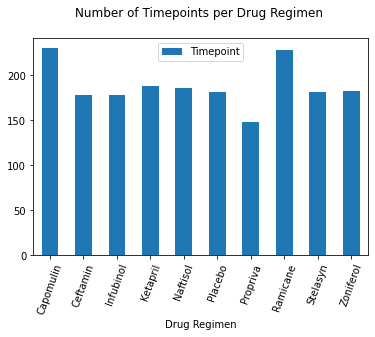

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
barchart_count_data = combined_clean_results_df[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen").count().reset_index()
barchart_count_data.plot.bar("Drug Regimen", "Timepoint", rot=70, title='Number of Timepoints per Drug Regimen \n')

# Alternative code
# count_results = combined_clean_results_df.groupby("Drug Regimen").count().reset_index()
# plot_regimen_data = {
#         "Drug Regimen": list(count_results["Drug Regimen"]),
#         "No of Timepoints": list(count_results["Timepoint"])}
# plot_regimen_data = pd.DataFrame(data=plot_regimen_data)
# plot_regimen_data.plot.bar("Drug Regimen", "No of Timepoints", rot=70, title='Number of Timepoints per Drug Regimen \n')

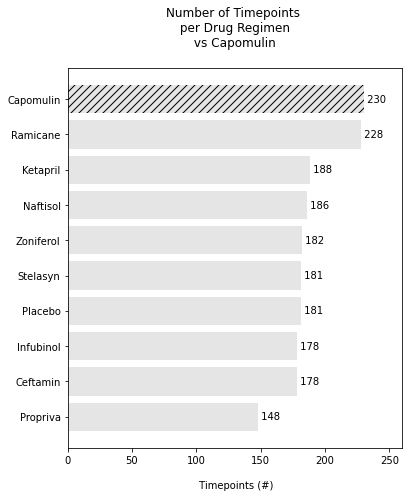

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
count_results = combined_clean_results_df.groupby("Drug Regimen").count().reset_index().sort_values("Timepoint")
regimen = list(count_results["Drug Regimen"])
timepoint = list(count_results["Timepoint"])

hatch_l = []
for drug in regimen:
    if drug == "Capomulin":
        hatch_l.append("///")
    else:
        hatch_l.append("")

fig1, ax = plt.subplots(figsize=(6,7))
hbars = ax.barh(regimen, timepoint, align="center", color="grey", hatch=hatch_l, alpha=0.2)
ax.bar_label(hbars, fmt=' %.0f')
ax.set_xlim(right=count_results["Timepoint"].max()+30)
ax.set_xlabel('\n Timepoints (#)')
ax.set_title('Number of Timepoints \n per Drug Regimen \n vs Capomulin \n')

plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice \n (N = 248)'}>

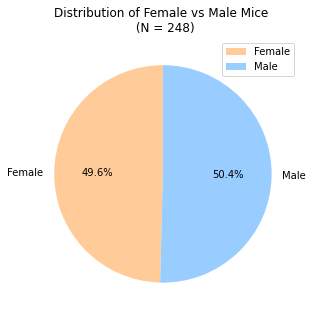

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
piechart_sex_data = combined_clean_results_df[["Sex", "Mouse ID"]].drop_duplicates().groupby(["Sex"]).count()
N = piechart_sex_data["Mouse ID"].sum()

piechart_sex_data.plot.pie(
        y="Mouse ID", 
        label="", 
        autopct="%1.1f%%", 
        colors=["#FFCC99","#99CCFF"],
        figsize=(5,5), startangle=90,
        title=f"Distribution of Female vs Male Mice \n (N = {N})")

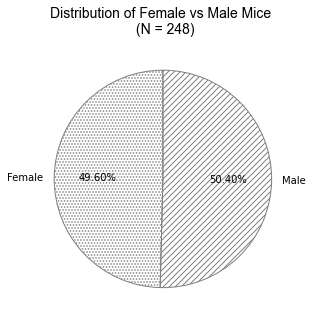

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_sex = combined_clean_results_df[["Sex", "Mouse ID"]].drop_duplicates().groupby(["Sex"]).count().reset_index()
sex = list(count_sex["Sex"])
mouse_id = list(count_sex["Mouse ID"])
N = count_sex["Mouse ID"].sum()

title_font = {'fontname':'Arial', 'size':'14', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
hatching = ["....", "////"]

fig, ax = plt.subplots(figsize=(5,5))
wedges = plt.pie(
        mouse_id,
        labels=sex,
        autopct="%1.2f%%",
        colors=["#FFCC99","#99CCFF"],
        startangle=90) 
plt.title(f"Distribution of Female vs Male Mice \n (N = {N})", **title_font)
plt.rc("font", size=12)
for i in range(len(wedges[0])):
    wedges[0][i].set(hatch = hatching[i], color="grey", fill=False)

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = combined_clean_results_df["Drug Regimen"].unique()
print(treatment_list)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [19]:
treatment_selected = [
    treatment_list[1], 
    treatment_list[0], 
    treatment_list[2], 
    treatment_list[4]]
treatment_selected_ser = pd.Series(treatment_selected)

In [20]:
# Create empty list to fill with tumour vol data (for plotting)
mouse_id_list = []
drug_regimen_list = []
tumour_select_list = []

# Locate the rows which contain mice on each drug and get the tumour volumes
tumour_vol_list = combined_clean_results_df.groupby("Mouse ID").max().reset_index()

index = 0

for index in range(len(tumour_vol_list.index)):
    if tumour_vol_list.iloc[index,1] in treatment_selected_ser.values:
        mouse_id_list.append(tumour_vol_list.iloc[index,0])
        drug_regimen_list.append(tumour_vol_list.iloc[index,1])
        tumour_select_list.append(tumour_vol_list.iloc[index,6])

selected_tumour_vol_df = pd.DataFrame({
    "Mouse ID" :mouse_id_list,
    "Drug Regimen" : drug_regimen_list,
    "Tumour Vol (mm3)" : tumour_select_list})

# Calculate the IQR and quantitatively determine if there are any potential outliers
quartiles = selected_tumour_vol_df["Tumour Vol (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumour volume (mm3) is: {lowerq:.1f}")
print(f"The upper quartile of tumour volume (mm3) is: {upperq:.1f}")
print(f"The interquartile range of tumour volume (mm3) is: {iqr:.1f}")
print(f"The the median of tumour volume (mm3) is: {quartiles[0.5]:.1f} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.1f} could be outliers")
print(f"Values above {upper_bound:.1f} could be outliers")

outlier_tumor_vol = selected_tumour_vol_df.loc[\
    (selected_tumour_vol_df['Tumour Vol (mm3)'] < lower_bound) |\
    (selected_tumour_vol_df['Tumour Vol (mm3)'] > upper_bound)]

min = selected_tumour_vol_df["Tumour Vol (mm3)"].min()
max = selected_tumour_vol_df["Tumour Vol (mm3)"].max()

print(f"\nSmallest final tumour volume (mm3) is {min:.1f}\nLargest final tumour volume (mm3) is {max:.1f}")

The lower quartile of tumour volume (mm3) is: 45.5
The upper quartile of tumour volume (mm3) is: 59.9
The interquartile range of tumour volume (mm3) is: 14.4
The the median of tumour volume (mm3) is: 46.9 
Values below 23.9 could be outliers
Values above 81.6 could be outliers

Smallest final tumour volume (mm3) is 45.0
Largest final tumour volume (mm3) is 72.2


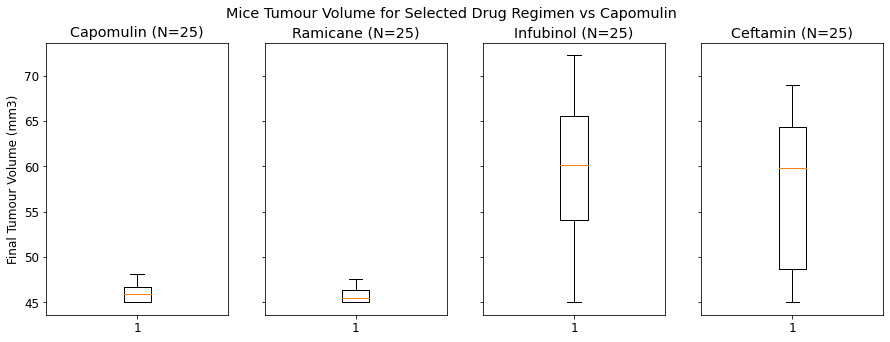

In [21]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
tumour_vol_1 = selected_tumour_vol_df.loc[selected_tumour_vol_df["Drug Regimen"]==treatment_selected_ser[0],["Tumour Vol (mm3)"]]
tumour_vol_2 = selected_tumour_vol_df.loc[selected_tumour_vol_df["Drug Regimen"]==treatment_selected_ser[1],["Tumour Vol (mm3)"]]
tumour_vol_3 = selected_tumour_vol_df.loc[selected_tumour_vol_df["Drug Regimen"]==treatment_selected_ser[2],["Tumour Vol (mm3)"]]
tumour_vol_4 = selected_tumour_vol_df.loc[selected_tumour_vol_df["Drug Regimen"]==treatment_selected_ser[3],["Tumour Vol (mm3)"]]

fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,5))
fig2.suptitle('Mice Tumour Volume for Selected Drug Regimen vs Capomulin\n')

ax1.boxplot(tumour_vol_1["Tumour Vol (mm3)"])
ax2.boxplot(tumour_vol_2["Tumour Vol (mm3)"])
ax3.boxplot(tumour_vol_3["Tumour Vol (mm3)"])
ax4.boxplot(tumour_vol_4["Tumour Vol (mm3)"])

N1 = len(tumour_vol_1["Tumour Vol (mm3)"])
N2 = len(tumour_vol_2["Tumour Vol (mm3)"])
N3 = len(tumour_vol_3["Tumour Vol (mm3)"])
N4 = len(tumour_vol_4["Tumour Vol (mm3)"])

ax1.set_ylabel('Final Tumour Volume (mm3)')

ax1.set_title(f"{treatment_selected_ser[0]} (N={N1})")
ax2.set_title(f"{treatment_selected_ser[1]} (N={N2})")
ax3.set_title(f"{treatment_selected_ser[2]} (N={N3})")
ax4.set_title(f"{treatment_selected_ser[3]} (N={N4})")

plt.show()

## Line and Scatter Plots

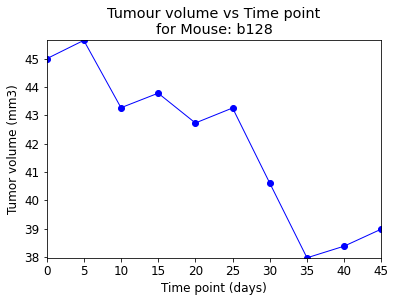

In [43]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
selected_mouse = "b128"
selected_mouse_data = combined_clean_results_df.loc[combined_clean_results_df["Mouse ID"]==selected_mouse,:]

x_axis = selected_mouse_data["Timepoint"]
y_axis = selected_mouse_data["Tumour Volume (mm3)"]

plt.title(f"Tumour volume vs Time point\nfor Mouse: {selected_mouse}")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor volume (mm3)")

plt.xlim(0, 45)
plt.ylim(selected_mouse_data["Tumour Volume (mm3)"].min(), selected_mouse_data["Tumour Volume (mm3)"].max())

plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)
plt.show()

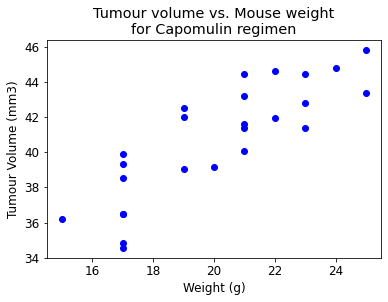

In [45]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
selected_regimen = "Capomulin"
selected_regimen_data = combined_clean_results_df.loc[combined_clean_results_df["Drug Regimen"]==selected_regimen,:]
selected_reg_avgs = selected_regimen_data.groupby(["Mouse ID"]).mean().reset_index()

x_axis = selected_reg_avgs["Weight (g)"]
y_axis = selected_reg_avgs["Tumour Volume (mm3)"]

plt.title("Tumour volume vs. Mouse weight\nfor Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")

plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708721


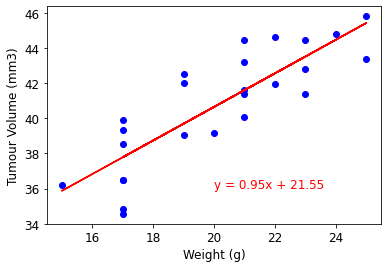

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis, color="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()